#Aplicação de morfologia na filtragem de ruído
- Autor: Iago Magalhães
- Matrícula: 559973
- Disciplina: Processamento Digital de Imagens
- Melhor resultado obtido com aplicação de dilatação com kernel = 5 após aplicação de erosão com kernel = 3 (abertura)

##Importação de bibliotecas

In [1]:
import cv2
import pylab
import numpy as np
import skimage.data as data
import matplotlib.pyplot as plt

##Aquisição da imagem

In [2]:
!wget https://i.stack.imgur.com/nP7bh.png

--2023-12-06 23:53:16--  https://i.stack.imgur.com/nP7bh.png
Resolving i.stack.imgur.com (i.stack.imgur.com)... 146.75.28.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|146.75.28.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15227 (15K) [image/png]
Saving to: ‘nP7bh.png’

nP7bh.png           100%[===================>]  14.87K  --.-KB/s    in 0s      

2023-12-06 23:53:16 (129 MB/s) - ‘nP7bh.png’ saved [15227/15227]



##Funções

###RGB para GRAY

In [3]:
def rgb_to_gray(img):
  '''
    Função para converter imagens RGB para Gray
    :param img: image array
    :return: image gray
  '''
  grayImage = np.zeros(img.shape)
  R = np.array(img[:, :, 0])
  G = np.array(img[:, :, 1])
  B = np.array(img[:, :, 2])

  R = (R *.299)
  G = (G *.587)
  B = (B *.114)

  Avg = (R+G+B)
  grayImage = img.copy()

  for i in range(3):
    grayImage[:,:,i] = Avg

  return grayImage

###Erosão

In [58]:
def erosao(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    result = np.zeros((height, width), dtype=np.uint8)

    kh_half, kw_half = k_height // 2, k_width // 2

    for i in range(height):
        for j in range(width):
            neighborhood = []
            for ki in range(k_height):
                for kj in range(k_width):
                    ni, nj = i + ki - kh_half, j + kj - kw_half
                    if 0 <= ni < height and 0 <= nj < width:
                        neighborhood.append(image[ni, nj])

            if np.any(np.array(neighborhood) == 0):
                result[i, j] = 0
            else:
                result[i, j] = 255

    return result

###Dilatação

In [61]:
def dilatacao(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    result = np.zeros((height, width), dtype=np.uint8)

    # Half kernel size for easier indexing
    kh_half, kw_half = k_height // 2, k_width // 2

    # Iterar sobre cada pixel na imagem
    for i in range(height):
        for j in range(width):
            # Coletar os valores na vizinhança definida pelo kernel
            neighborhood = []
            for ki in range(k_height):
                for kj in range(k_width):
                    ni, nj = i + ki - kh_half, j + kj - kw_half
                    if 0 <= ni < height and 0 <= nj < width:
                        neighborhood.append(image[ni, nj])

            # Verificar se algum valor na vizinhança é branco (255)
            if np.any(np.array(neighborhood) == 255):
                result[i, j] = 255
            else:
                result[i, j] = 0

    return result

##Convertendo imagem para tons de cinza

Shape da imagem convertida: (265, 470, 3)


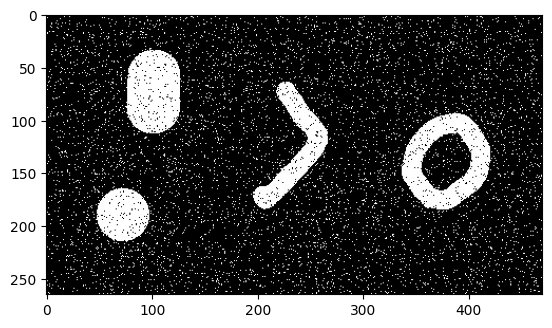

In [78]:
image = cv2.imread('/content/nP7bh.png')

grayImage = rgb_to_gray(image)

print("Shape da imagem convertida: {}".format(grayImage.shape))

plt.imshow(grayImage)
plt.show()

##Analisando processamento

###Aplicando erosão de kernel = 2

Shape da imagem convertida: (265, 470)


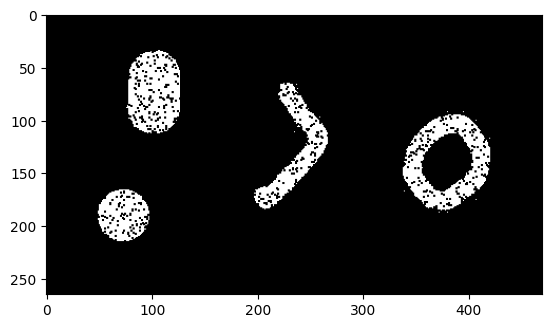

In [50]:
kernel = np.array([[1, 1],
                   [1, 1]], dtype=np.uint8)

resultErosao2 = erosao(grayImage, kernel)

print("Shape da imagem convertida: {}".format(resultErosao2.shape))

plt.imshow(resultErosao2, cmap='gray', vmin=0, vmax=255)
plt.show()

###Aplicando erosão de kernel = 3

Shape da imagem convertida: (265, 470)


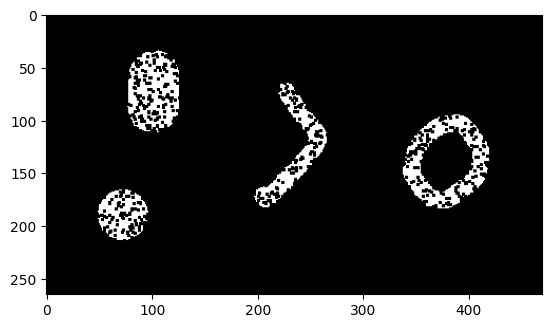

In [49]:
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], dtype=np.uint8)

resultErosao3 = erosao(grayImage, kernel)

print("Shape da imagem convertida: {}".format(resultErosao3.shape))

plt.imshow(resultErosao3, cmap='gray', vmin=0, vmax=255)
plt.show()

###Aplicando erosão de kernel = 5

Shape da imagem convertida: (265, 470)


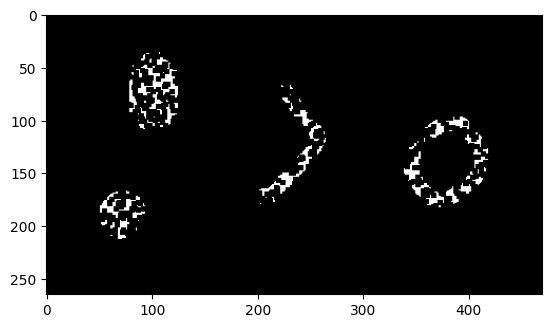

In [48]:
kernel = np.array([[1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1]], dtype=np.uint8)

resultErosao5 = erosao(grayImage, kernel)

print("Shape da imagem convertida: {}".format(resultErosao5.shape))

plt.imshow(resultErosao5, cmap='gray', vmin=0, vmax=255)
plt.show()

###Aplicando dilatação de kernel = 2 após aplicação de erosão de kernel = 2

Shape da imagem convertida: (265, 470)


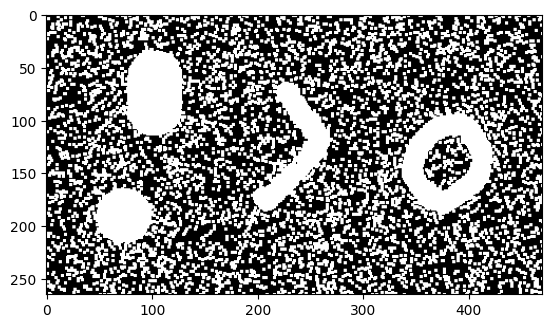

In [67]:
kernel = np.array([[1, 1],
                   [1, 1]], dtype=np.uint8)

resultDilatacao2 = dilatacao(resultErosao2, kernel)

print("Shape da imagem convertida: {}".format(resultDilatacao2.shape))

plt.imshow(resultDilatacao2, cmap='gray', vmin=0, vmax=255)
plt.show()

###Aplicando dilatação de kernel = 2 após aplicação de erosão de kernel = 3

Shape da imagem convertida: (265, 470)


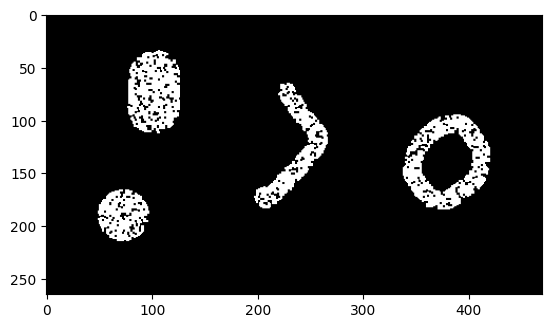

In [72]:
kernel = np.array([[1, 1],
                   [1, 1]], dtype=np.uint8)

resultDilatacao = dilatacao(resultErosao3, kernel)

print("Shape da imagem convertida: {}".format(resultDilatacao.shape))

plt.imshow(resultDilatacao, cmap='gray', vmin=0, vmax=255)
plt.show()

###Aplicando dilatação de kernel = 2 após aplicação de erosão de kernel = 5

Shape da imagem convertida: (265, 470)


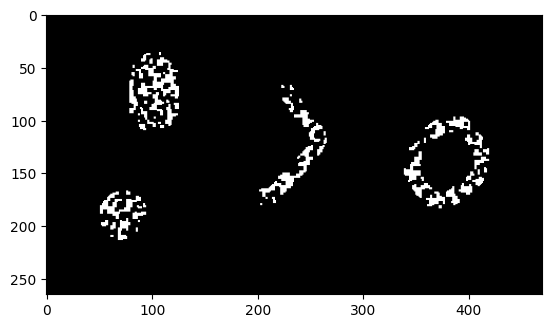

In [73]:
kernel = np.array([[1, 1],
                   [1, 1]], dtype=np.uint8)

resultDilatacao = dilatacao(resultErosao5, kernel)

print("Shape da imagem convertida: {}".format(resultDilatacao.shape))

plt.imshow(resultDilatacao, cmap='gray', vmin=0, vmax=255)
plt.show()

###Aplicando dilatação de kernel = 3 após aplicação de erosão de kernel = 2

Shape da imagem convertida: (265, 470)


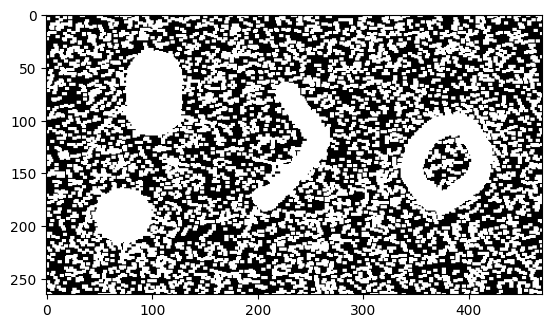

In [74]:
kernel = np.array([[1, 1, 1],
                   [1, 1, 1]], dtype=np.uint8)

resultDilatacao = dilatacao(resultErosao2, kernel)

print("Shape da imagem convertida: {}".format(resultDilatacao.shape))

plt.imshow(resultDilatacao, cmap='gray', vmin=0, vmax=255)
plt.show()

###Aplicando dilatação de kernel = 3 após aplicação de erosão de kernel = 3

Shape da imagem convertida: (265, 470)


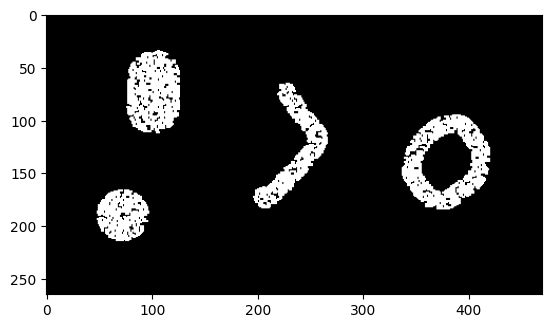

In [76]:
kernel = np.array([[1, 1, 1],
                   [1, 1, 1]], dtype=np.uint8)

resultDilatacao = dilatacao(resultErosao3, kernel)

print("Shape da imagem convertida: {}".format(resultDilatacao.shape))

plt.imshow(resultDilatacao, cmap='gray', vmin=0, vmax=255)
plt.show()

###Aplicando dilatação de kernel = 3 após aplicação de erosão de kernel = 5

Shape da imagem convertida: (265, 470)


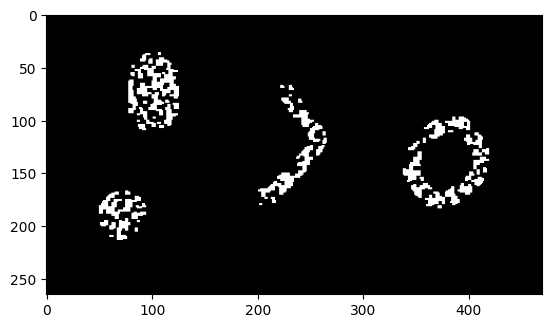

In [77]:
kernel = np.array([[1, 1, 1],
                   [1, 1, 1]], dtype=np.uint8)

resultDilatacao = dilatacao(resultErosao5, kernel)

print("Shape da imagem convertida: {}".format(resultDilatacao.shape))

plt.imshow(resultDilatacao, cmap='gray', vmin=0, vmax=255)
plt.show()

###Aplicando dilatação de kernel = 5 após aplicação de erosão de kernel = 2

Shape da imagem convertida: (265, 470)


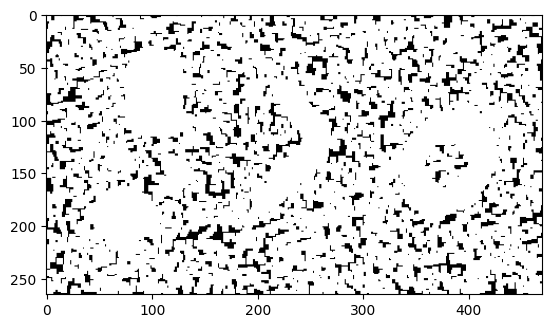

In [79]:
kernel = np.array([[1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1]], dtype=np.uint8)

resultDilatacao = dilatacao(resultErosao2, kernel)

print("Shape da imagem convertida: {}".format(resultDilatacao.shape))

plt.imshow(resultDilatacao, cmap='gray', vmin=0, vmax=255)
plt.show()

###Aplicando dilatação de kernel = 5 após aplicação de erosão de kernel = 3

Shape da imagem convertida: (265, 470)


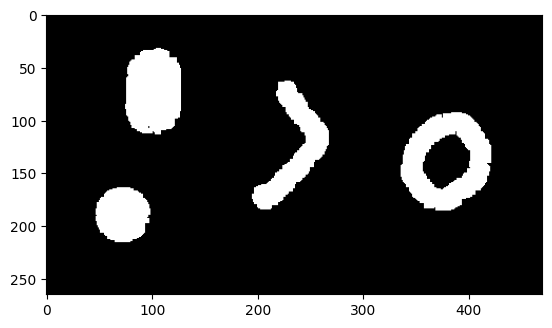

In [80]:
kernel = np.array([[1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1]], dtype=np.uint8)

resultDilatacao = dilatacao(resultErosao3, kernel)

print("Shape da imagem convertida: {}".format(resultDilatacao.shape))

plt.imshow(resultDilatacao, cmap='gray', vmin=0, vmax=255)
plt.show()

###Aplicando dilatação de kernel = 5 após aplicação de erosão de kernel = 5

Shape da imagem convertida: (265, 470)


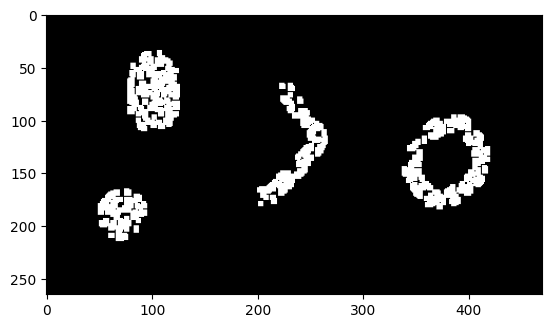

In [81]:
kernel = np.array([[1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1]], dtype=np.uint8)

resultDilatacao = dilatacao(resultErosao5, kernel)

print("Shape da imagem convertida: {}".format(resultDilatacao.shape))

plt.imshow(resultDilatacao, cmap='gray', vmin=0, vmax=255)
plt.show()